In [1]:
import pandas as pd
df = pd.read_csv('dataset_avaliacoes.csv')
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [2]:
df.shape

(15501, 4)

In [3]:
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [4]:
df.avaliacao[0]

'Esse smartphone superou minhas expectativas, recomendo'

In [5]:
df.avaliacao[1]

'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..'

Transformando texto em dados numéricos - Bag of words: Pegar todas as palavras e verificar a frequência dela em todas as avaliações


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns = vetorizar.get_feature_names_out())
matriz_esparsa
# uma linha para cada avaliação/frase

comprei  produto  ruim  um  ótimo
0        1        1     0   1      1
1        1        1     1   1      0

Aplicando para os nossos dados

In [46]:
vetorizar = CountVectorizer(lowercase= False)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
bag_of_words.shape

(15501, 23352)

In [47]:
# tem muitas colunas, vamos tirar as palavras de menor frequencia: ex: de, um
vetorizar = CountVectorizer(lowercase= False, max_features= 50)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
bag_of_words.shape

(15501, 50)

In [48]:
matriz_esparsa_avaliacoes = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns= vetorizar.get_feature_names_out())
matriz_esparsa_avaliacoes

Não  Produto  ainda  antes  as  até  bem  bom  chegou  com  ...  \
0        0        0      0      0   0    0    0    0       0    0  ...   
1        0        0      0      0   0    0    0    0       0    0  ...   
2        0        0      0      0   0    0    0    0       0    0  ...   
3        0        0      0      0   0    0    0    0       0    0  ...   
4        0        0      0      0   0    0    1    0       0    0  ...   
...    ...      ...    ...    ...  ..  ...  ...  ...     ...  ...  ...   
15496    0        0      0      0   0    0    0    0       0    0  ...   
15497    0        0      0      0   0    0    0    0       0    0  ...   
15498    0        0      0      0   0    0    0    0       0    0  ...   
15499    0        1      0      1   0    0    0    1       1    0  ...   
15500    0        0      0      0   0    0    0    0       0    0  ...   

       qualidade  que  recebi  recomendo  se  sem  tem  um  uma  veio  
0              0    0       0          1   0    0    0   0    0     0  
1              0    0       0          0   1    0    0   0    0     0  
2              0    0       0          0   0    0    0   0    0     0  
3              0    1       0          0   0    0    0   0    0     0  
4              1    2       0          0   0    0    0   0    0     0  
...          ...  ...     ...        ...  ..  ...  ...  ..  ...   ...  
15496          0    0       0          1   0    0    0   0    0     0  
15497          0    1       0          0   0    0    1   0    0     0  
15498          0    0       0          0   0    0    0   1    0     0  
15499          0    0       0          0   0    0    0   0    0     0  
15500          0    0       0          0   0    0    0   0    0     0  

[15501 rows x 50 columns]

Separando entre Treino e Teste

In [49]:
from sklearn.model_selection import train_test_split

# lembrando, aqui estamos selecionando variáveis explicativas e variável alvo
X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, df.sentimento, random_state=4978)

### Regressão Logística
A **regressão logística** é um modelo estatístico usado para classificação. Diferente da regressão linear, que prevê valores contínuos, a regressão logística prevê probabilidades e é usada principalmente para classificação binária (exemplo: 0 ou 1, "sim ou não", "fraude ou não fraude"; No nosso caso, se é "positiva" ou "negativa").

$$P(Y = 1 | X) = \sigma(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n) = \dfrac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}}$$

Durante o treinamento, o modelo ajusta os pesos iterativamente para minimizar os erros, utilizando um método chamado Gradiente Descendente, que otimiza a função de custo (entropia cruzada) para encontrar os melhores parâmetros beta. A saída final do modelo é uma probabilidade, e para classificar um dado, se essa probabilidade ultrapassa um determinado limiar (geralmente 0.5), o modelo classifica a entrada como pertencente à classe positiva; caso contrário, ela pertence à classe negativa. Esse limiar pode ser ajustado conforme o problema, por exemplo, para reduzir falsos positivos ou negativos.

In [50]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)
acuracia = regressao_logistica.score(X_teste, y_teste)
acuracia

# então só com palavras chave, já conseguimos ter uma acurácia de 79 %. Lembrando que as palavras estavam separadas mais ou menos 
# 50/50 positivas ou negativas


0.7982456140350878

Usar uma nuvem de palavras para ver a frequência que cada palavra aparece

In [51]:
from wordcloud import WordCloud
todas_palavras = [texto for texto in df.avaliacao]
todas_palavras

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [52]:
todas_palavras = ' '.join(todas_palavras)
todas_palavras

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancela

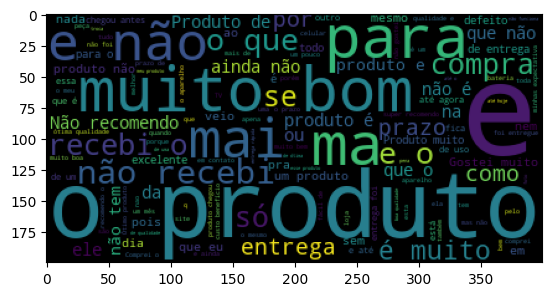

In [53]:
nuvem_palavras = WordCloud().generate(todas_palavras)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

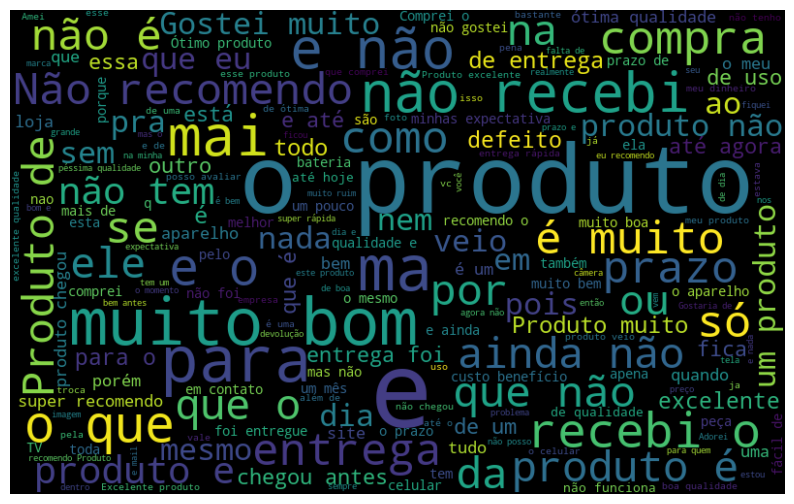

In [54]:
nuvem_palavras = WordCloud(width = 800, height= 500, max_font_size= 110).generate(todas_palavras)
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation= 'bilinear')
plt.axis('off')
plt.show()
# veja que ele não tá tratando as palavras individualmente

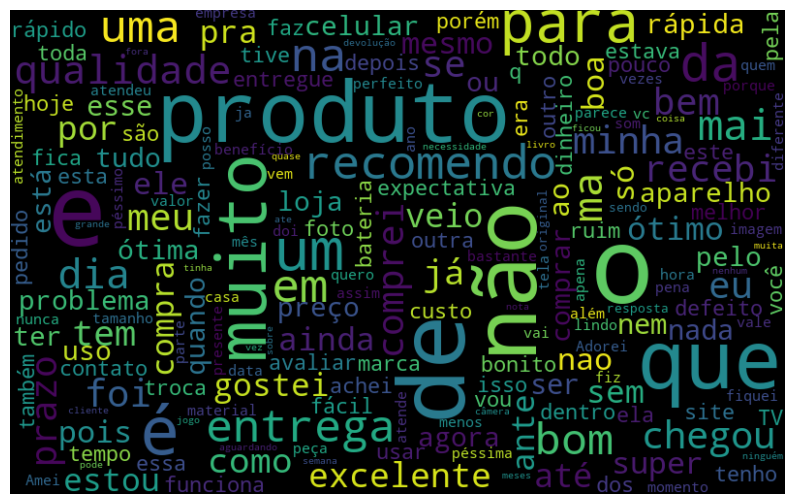

In [55]:
nuvem_palavras = WordCloud(width = 800, height= 500, max_font_size= 110, collocations= False).generate(todas_palavras)
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation= 'bilinear')
plt.axis('off')
plt.show()
# veja que ele não tá tratando as palavras individualmente

Como verificar quais palavras estão com um resultado mais positivo/negativo; o que o pessoal tá gostando/odiando muito?

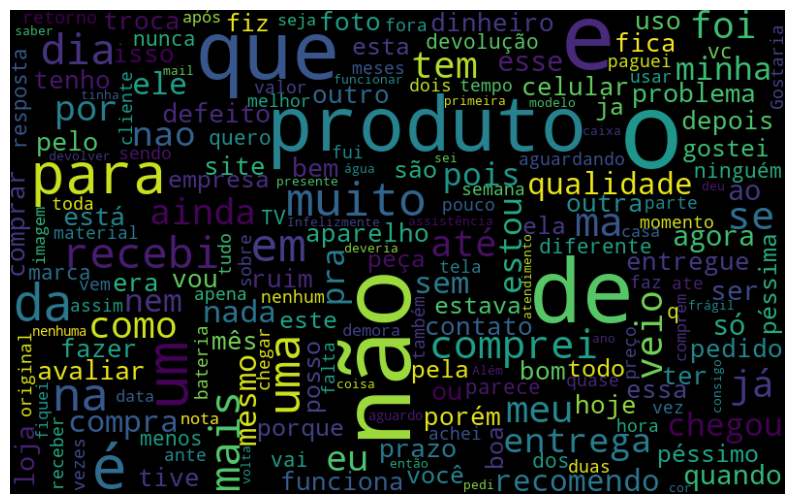

In [56]:
def nuvem_palavras(texto, coluna_texto, sentimento):
    texto_sentimento = texto.query(f"sentimento == '{sentimento}'")[coluna_texto]
    texto_unido = ' '.join(texto_sentimento)    
    nuvem_palavras = WordCloud(width = 800, height= 500, max_font_size= 110, collocations= False).generate(texto_unido)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation= 'bilinear')
    plt.axis('off')
    plt.show()
    
nuvem_palavras(df, 'avaliacao', 'negativo')

# então estamos verificando quais são as palavras mais frequentes em avaliações negativas

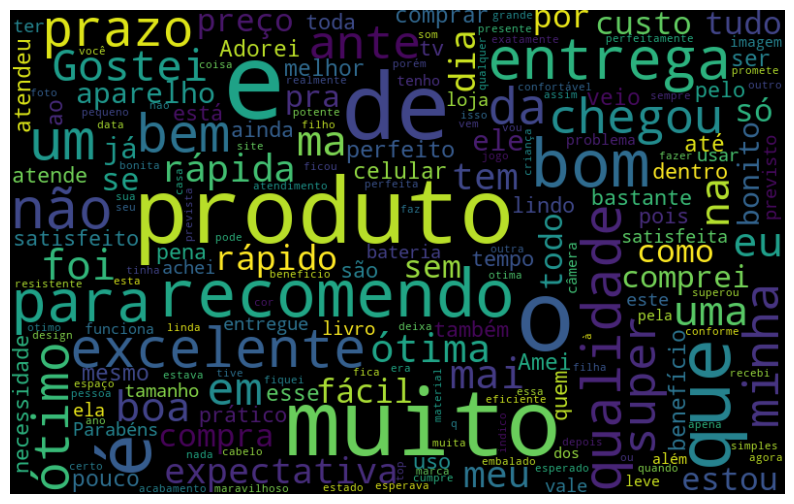

In [57]:
nuvem_palavras(df, 'avaliacao', 'positivo')

### Dividindo o texto em unidades menores

O que vamos fazer é avaliar a frequência de maneira geral. Lembre que o que fizemos antes foi verificar a frequência das palavras em uma dada frase, não em todas as frases

### Tokenização

In [58]:
import nltk
frases = ['um produto bom', 'um produto ruim']
frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um produto bom': 1, 'um produto ruim': 1})

In [59]:
from nltk import tokenize
frase = 'O produto é excelente e a entrega foi muito rápida!'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['O',
 'produto',
 'é',
 'excelente',
 'e',
 'a',
 'entrega',
 'foi',
 'muito',
 'rápida!']

In [60]:
token_frase = token_espaco.tokenize(todas_palavras)
token_frase

['Esse',
 'smartphone',
 'superou',
 'minhas',
 'expectativas,',
 'recomendo',
 'o',
 'cheiro',
 'e',
 'muito',
 'desagradavel!!',
 'pra',
 'quem',
 'se',
 'incomoda',
 'nao',
 'recomendoo..',
 'Eu',
 'fiz',
 'a',
 'compra',
 'a',
 'loja',
 'não',
 'entregou',
 'o',
 'produto,',
 'a',
 'compra',
 'foi',
 'feita',
 'no',
 'cartão',
 'de',
 'credito',
 'e',
 'ate',
 'o',
 'momento',
 'a',
 'loja',
 'também',
 'nao',
 'me',
 'devolveu',
 'o',
 'valor',
 'da',
 'compra.',
 'Atendeu',
 'minhas',
 'expectativas,',
 'só',
 'achei',
 'a',
 'luz',
 'ruim,',
 'mas',
 'nada',
 'que',
 'dificulte',
 'seu',
 'funcionamento.',
 'Gostei',
 'muito,',
 'só',
 'achei',
 'que',
 'ficou',
 'a',
 'desejar',
 'a',
 'qualidade',
 'das',
 'fotos.',
 'Achei',
 'que',
 'fosse',
 'bem',
 'melhor',
 '.',
 'Comprei',
 'o',
 'produto',
 'e',
 'ñ',
 'tinha',
 'para',
 'entrega',
 'isso',
 'não',
 'foi',
 'legal!!!!!!',
 'o',
 'produto',
 'pode',
 'até',
 'ser',
 'bom',
 ',mais',
 'só',
 'posso',
 'avalia-lo',
 'depo

In [61]:
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})
df_frequencia.head()

Palavra  Frequência
0           Esse         101
1     smartphone          33
2        superou          90
3         minhas         533
4  expectativas,          79

In [62]:
df_frequencia.sort_values('Frequência', ascending=False)[:20]

Palavra  Frequência
8          e       11813
6          o       10865
29        de       10280
19         a        8873
46       que        7657
22       não        7286
163        é        4786
63   produto        4765
177      com        4641
130       do        4583
9      muito        4328
66      para        3664
132       um        3588
27        no        2588
37        da        2584
175        O        2561
207       em        2483
173      uma        2146
142       na        2103
159     mais        1886

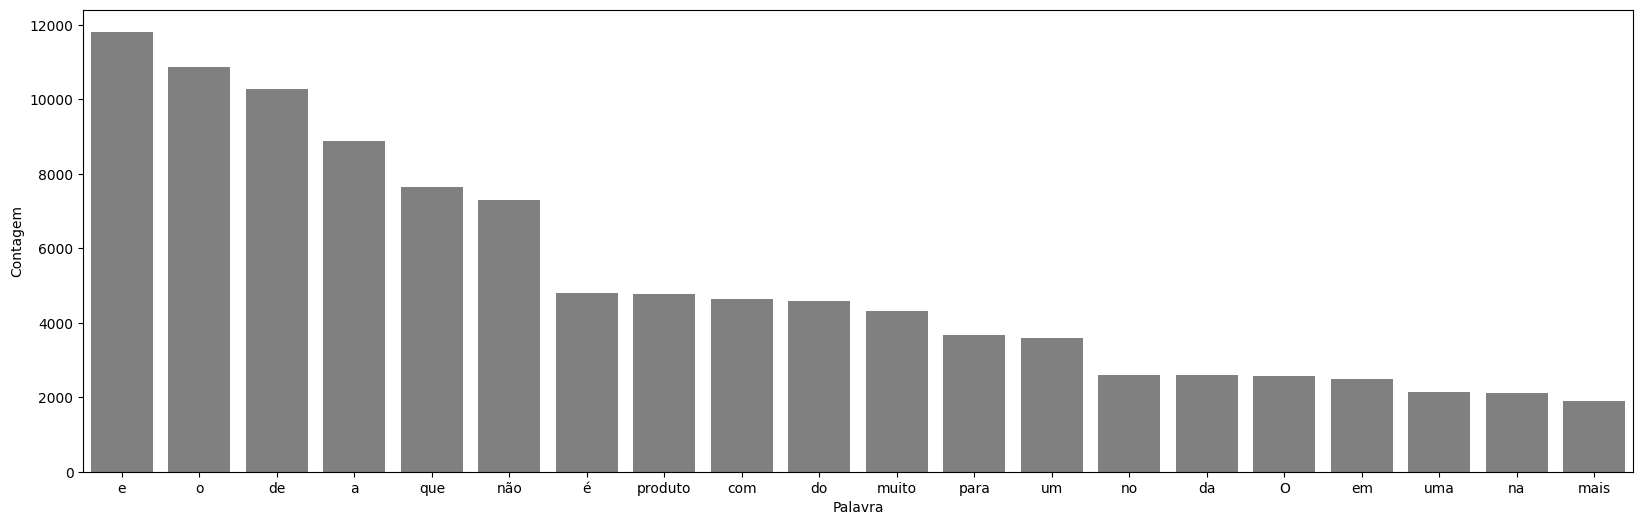

In [63]:
import seaborn as sns

plt.figure(figsize= (20, 6))
ax = sns.barplot(data = df_frequencia.sort_values('Frequência', ascending=False)[:20], x = 'Palavra', y= 'Frequência', color = 'gray')
ax.set_ylabel("Contagem")
plt.show()
# essas palavras não servem pra nada po

In [64]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Felipe
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Essas palavras não servem pra nada, são chamadas de Stopwords, que prejudicam nosso modelo

In [65]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [66]:
# podemos também adicionar palavras irrelevantes né, basta fazer, por exemplo:
palavras_irrelevantes.append("pra")

In [67]:
frase_processada = []

for opiniao in df.avaliacao:
    palavras_texto = token_espaco.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_1'] = frase_processada
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  
0   positivo    Esse smartphone superou expectativas, recomendo  
1   negativo    cheiro desagradavel!! incomoda nao recomendoo..  
2   negativo  Eu fiz compra loja entregou produto, compra fe...  
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...  
4   positivo  Gostei muito, achei ficou desejar qualidade fo...

O quanto fazer isso impactava no nosso modelo de regressão logística?

In [68]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=4978)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_treino, y_treino)
    acuracia = regressao_logistica.score(X_teste, y_teste)
    return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100:.2f}%")

classificar_texto(df, 'tratamento_1', 'sentimento')
#melhoramos tirando stopwords

Acurácia do modelo com 'tratamento_1': 81.19%


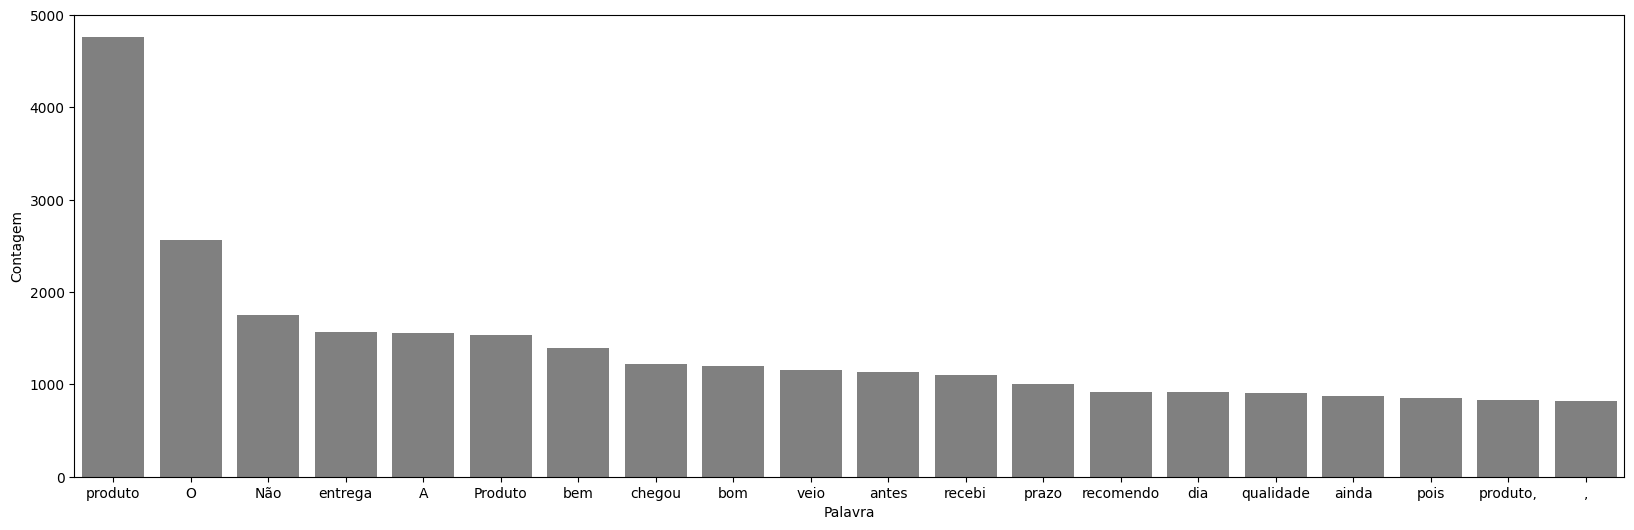

In [69]:
def grafico_frequencia(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequencia, x="Palavra", y ="Frequência", color='gray')
    ax.set(ylabel="Contagem")
    plt.show()

grafico_frequencia(df, 'tratamento_1', 20)

In [70]:
# seria legal separar a pontuação e acentos também
frase = 'Esse smartphone superou expectativas, recomendo'

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase  = token_pontuacao.tokenize(frase)
token_frase

['Esse', 'smartphone', 'superou', 'expectativas', ',', 'recomendo']

In [71]:
frase_processada = []
for opiniao in df['tratamento_1']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    # aqui só pegamos palavras
    nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_2'] = frase_processada

df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo    cheiro desagradavel!! incomoda nao recomendoo..   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  
0     Esse smartphone superou expectativas recomendo  
1        cheiro desagradavel incomoda nao recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

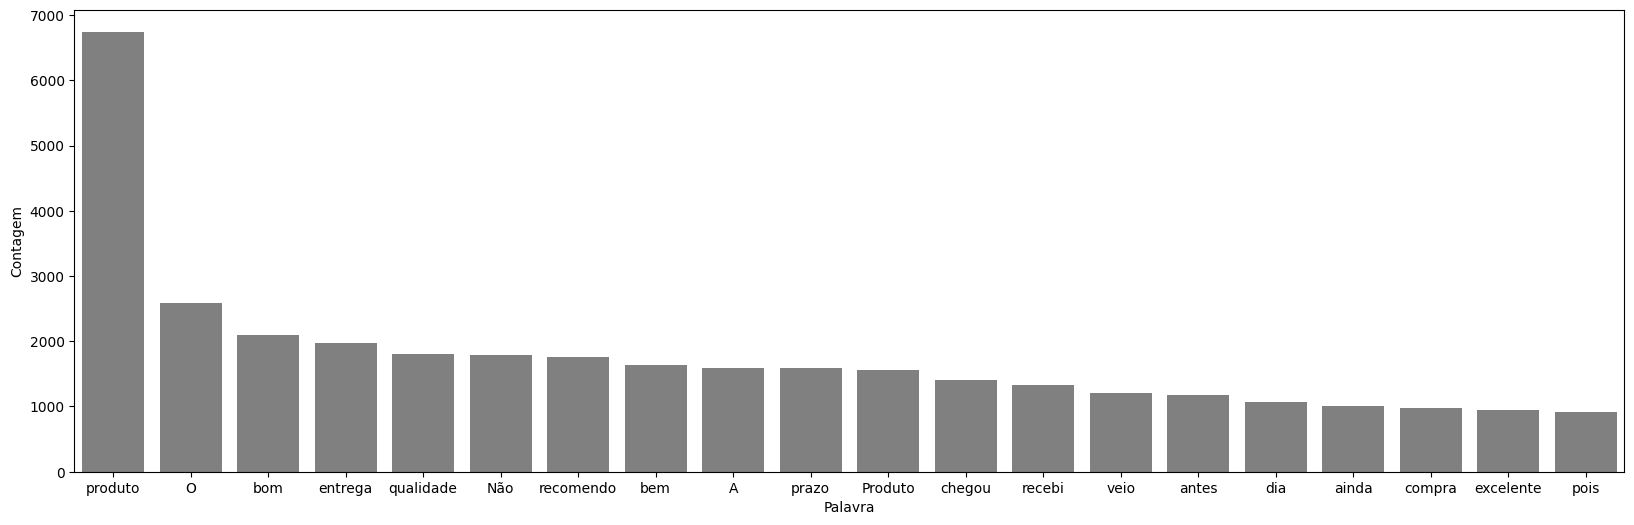

In [72]:
grafico_frequencia(df, 'tratamento_2', 20)

In [73]:
import unidecode

frase =  'Um aparelho ótima performance preço bem menor outros aparelhos marcas conhecidas performance semelhante'

teste = unidecode.unidecode(frase)
teste


'Um aparelho otima performance preco bem menor outros aparelhos marcas conhecidas performance semelhante'

In [74]:
sem_acentos = [unidecode.unidecode(texto) for texto in df['tratamento_2']]
stop_words_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

df['tratamento_3'] = sem_acentos

frase_processada = []
for opiniao in df['tratamento_3']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stop_words_sem_acento]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_3'] = frase_processada

df.head(10)

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   
5         13086  Comprei o produto e ñ tinha para entrega isso ...     1   
6        117549  o produto pode até ser bom ,mais só posso aval...     1   
7         56436  já enviei duas reclamações, mas não obtive res...     1   
8        127040  nao recebi o produto, pois voces nao cumpriram...     1   
9         12906  A partir de 2017 os jogos online passaram a ap...     2   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo    cheiro desagradavel!! incomoda nao recomendoo..   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   
5   negativo              Comprei produto ñ entrega legal!!!!!!   
6   negativo  produto pode bom ,mais posso avalia-lo feito t...   
7   negativo  enviei duas reclamações, obtive resposta. rece...   
8   negativo  nao recebi produto, pois voces nao cumpriram c...   
9   negativo  A partir 2017 jogos online passaram apresentar...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   
5                    Comprei produto ñ entrega legal   
6  produto pode bom posso avalia lo feito troca u...   
7  enviei duas reclamações obtive resposta recebi...   
8  nao recebi produto pois voces nao cumpriram co...   
9  A partir jogos online passaram apresentar prob...   

                                        tratamento_3  
0     Esse smartphone superou expectativas recomendo  
1            cheiro desagradavel incomoda recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...  
5                    Comprei produto n entrega legal  
6  produto pode bom posso avalia lo feito troca u...  
7  enviei duas reclamacoes obtive resposta recebi...  
8  recebi produto pois cumpriram compromisso firm...  
9  A partir jogos online passaram apresentar prob...

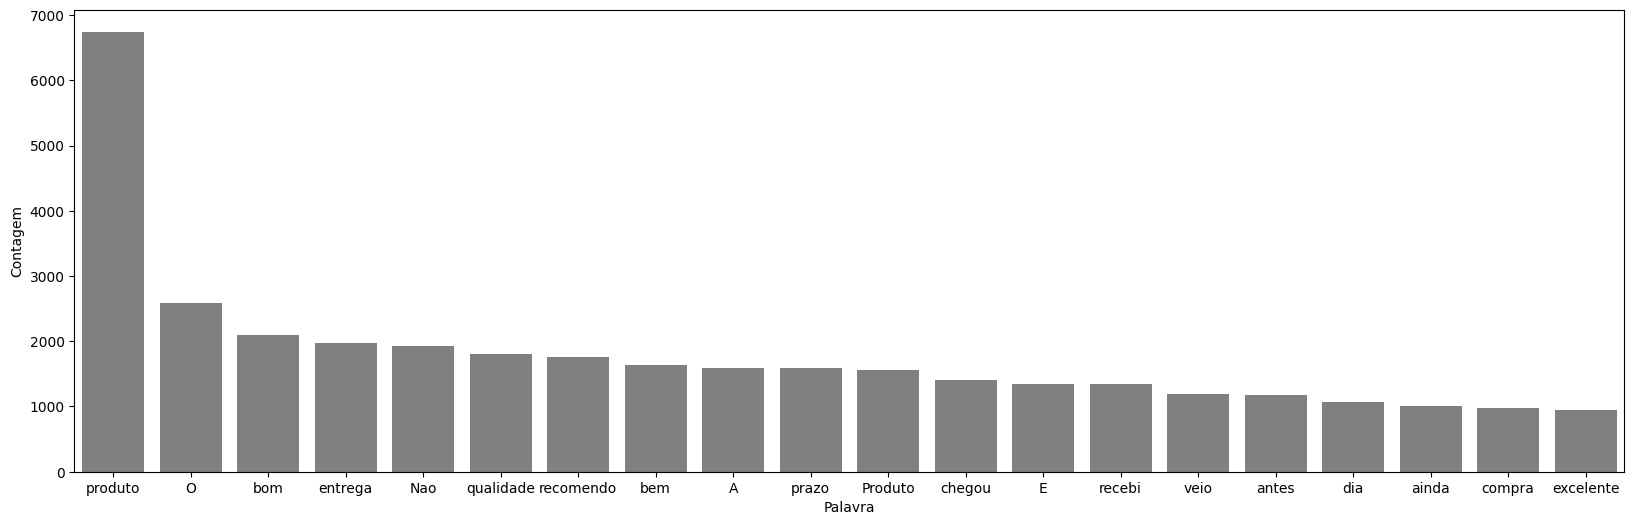

In [75]:
grafico_frequencia(df, 'tratamento_3', 20)


In [76]:
frase_processada = []

for opiniao in df['tratamento_3']:
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stop_words_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo    cheiro desagradavel!! incomoda nao recomendoo..   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1            cheiro desagradavel incomoda recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_4  
0          smartphone superou expectativas recomendo  
1            cheiro desagradavel incomoda recomendoo  
2  fiz compra loja entregou produto compra feita ...  
3  atendeu expectativas achei luz ruim nada dific...  
4  gostei achei ficou desejar qualidade fotos ach...

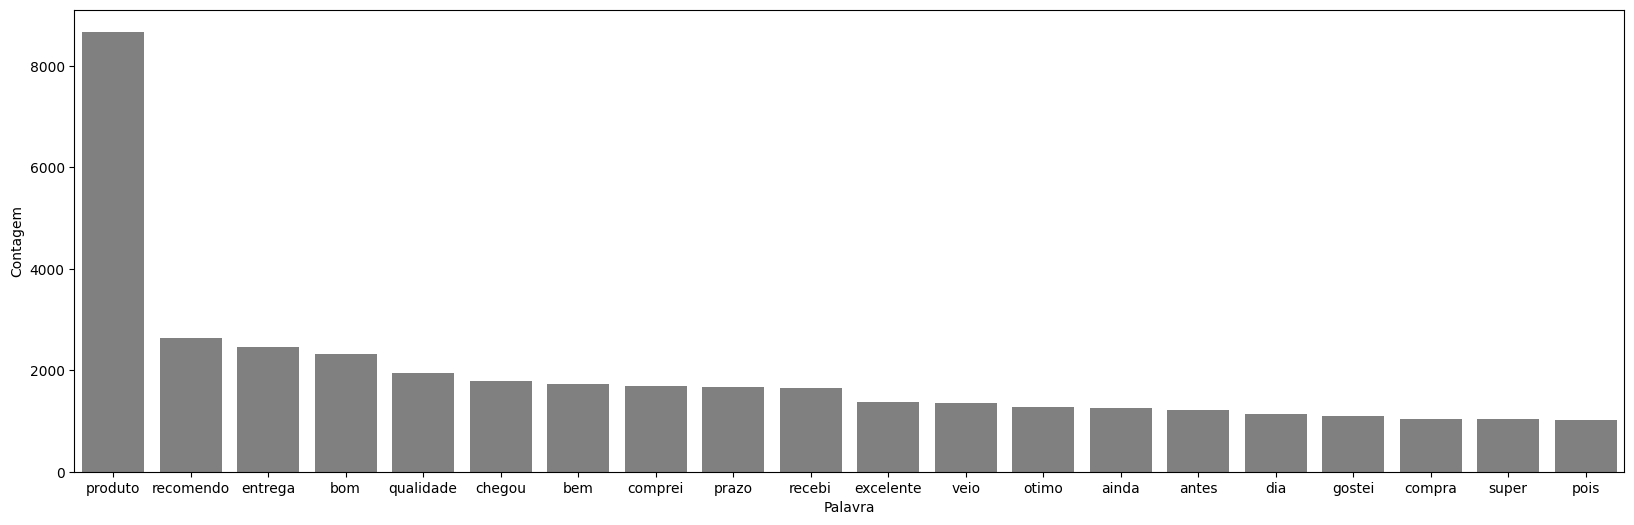

In [77]:
grafico_frequencia(df, 'tratamento_4', 20)

In [78]:
classificar_texto(df, 'tratamento_4', 'sentimento')

Acurácia do modelo com 'tratamento_4': 83.80%


Será que tem como melhorar mais?
Agrupando palavras que tenham a mesma semântica, escrita de maneiras diferentes
Ex: 'gostei' e 'gostado'

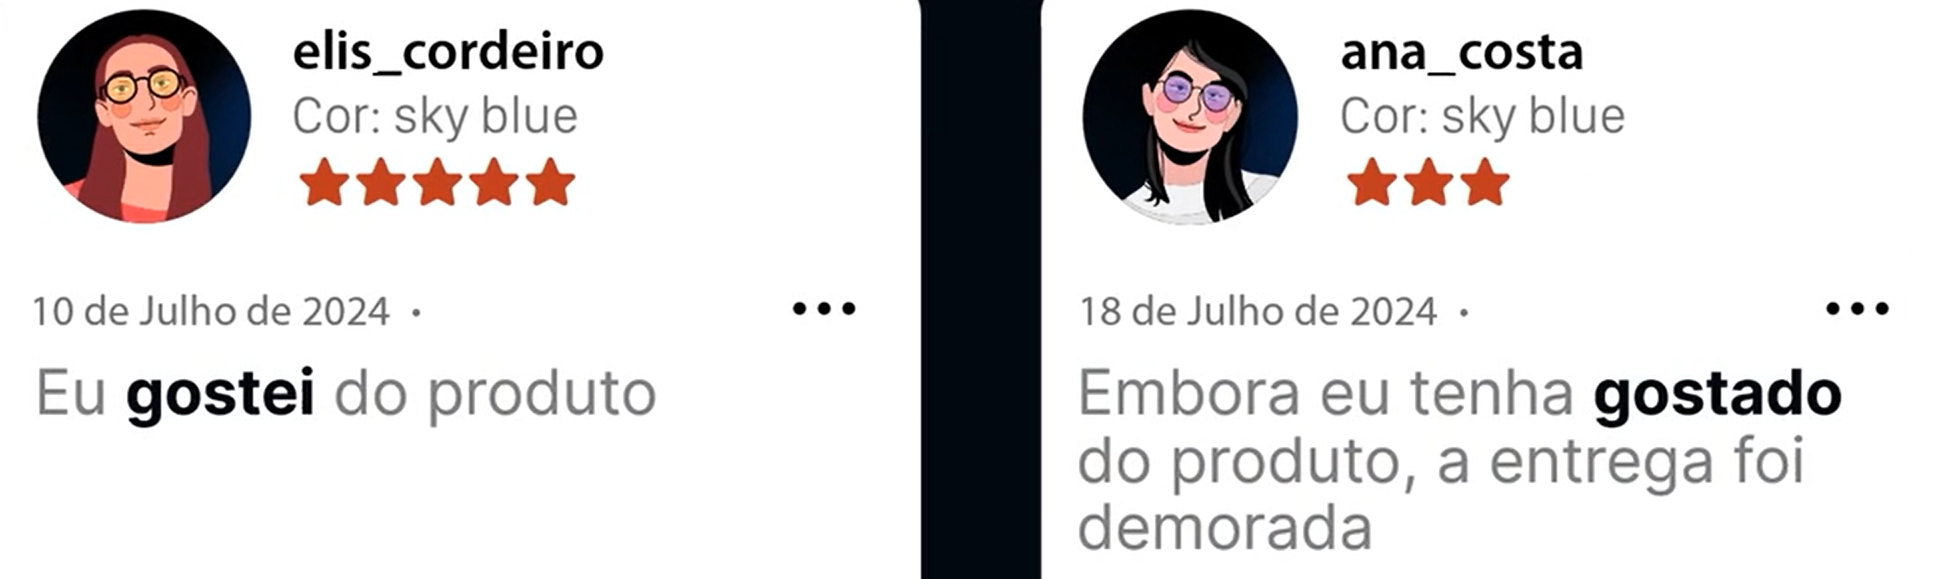

### Limitando palavras apenas ao radical com Stemming

In [81]:
# essa biblioteca reduz radicais da lingua portuguesa
stemmer = nltk.RSLPStemmer()
stemmer.stem('gostei')



'gost'

In [82]:
stemmer.stem('gostado')

'gost'

In [83]:
stemmer.stem('gostou')

'gost'

In [84]:
frase_processada = []
for opiniao in df['tratamento_4']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_5'] = frase_processada
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo    cheiro desagradavel!! incomoda nao recomendoo..   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1            cheiro desagradavel incomoda recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_4  \
0          smartphone superou expectativas recomendo   
1            cheiro desagradavel incomoda recomendoo   
2  fiz compra loja entregou produto compra feita ...   
3  atendeu expectativas achei luz ruim nada dific...   
4  gostei achei ficou desejar qualidade fotos ach...   

                                        tratamento_5  
0                       smartphon super expect recom  
1                  cheir desagrada incomod recomendo  
2  fiz compr loj entreg produt compr feit carta c...  
3     atend expect ach luz ruim nad dificult funcion  
4         gost ach fic desej qual fot ach bem melhor

In [85]:
classificar_texto(df, 'tratamento_5', 'sentimento')

Acurácia do modelo com 'tratamento_5': 85.17%


Aqui tem uma outra técnica bizu também: Lematização, que também simplifica as palavras, mas de outra maneira. Enquanto o stemming reduz a palavra sem considerar o contexto gramatical, a lematização transforma a palavra em sua forma dicionarizada, ou seja, a palavra tal como aparece em um dicionário. Por exemplo, "correu" seria transformado em "correr", enquanto "correções" seria reduzido a "correção".

Evitaria erros do tipo da palavra "inútil", o prefixo 'in-' poderia ser removido, resultando em 'útil', o que mudaria completamente o significado da palavra original.


Pensemos: se uma pessoa escreve uma avaliação dizendo "achei o produto ótimo", a palavra que está transmitindo a **intensidade do sentimento**, seja ele positivo ou negativo, é a palavra "ótimo". E se tivéssemos uma estratégia para atribuir um peso às palavras, de modo que aquelas que diferenciam sentimentos tivessem pesos maiores, permitindo que o modelo utilizasse isso para classificar o sentimento como positivo ou negativo? TF-IDF

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['Comprei um ótimo produto', 'Comprei um produto horrível']

tfidf = TfidfVectorizer(lowercase= False, max_features= 50)
matriz = tfidf.fit_transform(frases)
pd.DataFrame(matriz.todense(), columns = tfidf.get_feature_names_out())
# isso são os pesos que ele tá dando:

Comprei  horrível   produto        um     ótimo
0  0.448321  0.000000  0.448321  0.448321  0.630099
1  0.448321  0.630099  0.448321  0.448321  0.000000

Criando um modelo de Regressão Logística com o TF-IDF

In [90]:
# separou em pesos
tfidf_bruto = tfidf.fit_transform(df['avaliacao'])
# criou 
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_bruto, df['sentimento'], random_state= 4978)
regressao_logistica.fit(X_treino, y_treino)
print(f"Acurácia do modelo: {regressao_logistica.score(X_teste, y_teste)*100:.2f}%")

Acurácia do modelo: 79.54%


In [91]:
# com dados tratados

# separou em pesos
tfidf_tratados = tfidf.fit_transform(df['tratamento_5'])
# criou 
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_tratados, df['sentimento'], random_state= 4978)
regressao_logistica.fit(X_treino, y_treino)
print(f"Acurácia do modelo: {regressao_logistica.score(X_teste, y_teste)*100:.2f}%")

Acurácia do modelo: 85.47%


Estamos pensando na importância das palavras, mas não estamos pensando na ordem que as palavras estão e nem no contexto que estão inseridas

Imaginemos que uma pessoa escreveu uma avaliação para o nosso e-commerce e disse: "Eu fiz a compra e achei o produto ótimo." Se considerarmos a junção das palavras "produto ótimo", isso não tem mais força do que mencionar "produto" e "ótimo" separadamente?

N-grams capturam grupos de palavras consecutivas

In [92]:
from nltk import ngrams

frase = 'Comprei um produto ótimo'
frase_separada = token_espaco.tokenize(frase)
# existem vários tipos de agrupamentos, vamos agrupar em pares -> Bigrams
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'produto'), ('produto', 'ótimo')]

In [101]:
# vamos manter palavras únicas: vamos ter tanto unigrams quanto bigrams
# nesse caso, só temos os top 50 unigrams + bigrams
tfidf_50 = TfidfVectorizer(lowercase= False, max_features= 50, ngram_range=(1, 2))
vetor_tfidf = tfidf_50.fit_transform(df['tratamento_5'])

print(tfidf_50.get_feature_names_out())

X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state= 4978)
regressao_logistica.fit(X_treino, y_treino)

print(f"Acurácia do modelo com 50 features e ngrams: {regressao_logistica.score(X_teste, y_teste)*100:.2f}%")

['ach' 'agor' 'aind' 'ant' 'ant praz' 'aparelh' 'atend' 'bem' 'boa' 'bom'
 'celul' 'cheg' 'compr' 'dia' 'entreg' 'esper' 'excel' 'facil' 'faz' 'fic'
 'gost' 'loj' 'melhor' 'nad' 'otim' 'outr' 'ped' 'perfeit' 'pess' 'pod'
 'poi' 'por' 'praz' 'prec' 'problem' 'produt' 'qual' 'rap' 'receb'
 'receb produt' 'recom' 'sup' 'ter' 'tod' 'troc' 'tud' 'us' 'uso' 'val'
 'vei']
Acurácia do modelo com 50 features e ngrams: 85.06%


In [105]:

tfidf_100 = TfidfVectorizer(lowercase= False, max_features= 100, ngram_range=(1, 2))
vetor_tfidf = tfidf_100.fit_transform(df['tratamento_5'])


X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state= 4978)
regressao_logistica.fit(X_treino, y_treino)

print(f"Acurácia do modelo com 100 features e ngrams: {regressao_logistica.score(X_teste, y_teste)*100:.2f}%")

Acurácia do modelo com 100 features e ngrams: 88.11%


In [113]:
tfidf_1000 = TfidfVectorizer(lowercase= False, max_features= 1000, ngram_range=(1, 2))
vetor_tfidf = tfidf_1000.fit_transform(df['tratamento_5'])


X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state= 4978)
regressao_logistica.fit(X_treino, y_treino)

print(f"Acurácia do modelo com 1000 features e ngrams: {regressao_logistica.score(X_teste, y_teste)*100:.2f}%")

Acurácia do modelo com 1000 features e ngrams: 91.90%


In [ ]:
# e se usassemos tudo?
tfidf = TfidfVectorizer(lowercase= False, ngram_range=(1, 2))
vetor_tfidf = tfidf.fit_transform(df['tratamento_5'])


X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state= 4978)
regressao_logistica.fit(X_treino, y_treino)

print(f"Acurácia do modelo com todas as features e ngrams: {regressao_logistica.score(X_teste, y_teste)*100:.2f}%")

# ve que é quase o mesmo resultado com 1000 features

Acurácia do modelo com todas as features e ngrams: 91.98%


In [110]:
vetor_tfidf.shape
# 113871 features é muito, e nem tá aumentando a acurácia

(15501, 113971)

In [116]:
# quanto de peso o modelo de regressão logística dá para palavras em sentimento positivo ou negativo
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf_1000.get_feature_names_out()
)
pesos.nlargest(50, 0)

0
otim          7.782877
excel         7.467821
bom           5.914478
perfeit       5.177628
ador          5.101078
satisfeit     4.889823
rap           4.181146
lind          3.770585
ame           3.551333
maravilh      3.540779
pra           3.115318
bast          2.829780
boa           2.807373
expect        2.796576
surpreend     2.760524
sup           2.674807
recom         2.673576
gost          2.660737
bem           2.572657
conhec        2.525363
exat          2.474336
facil         2.423696
otim produt   2.306949
parab         2.256836
top           2.252194
ant           2.206307
ant praz      2.165281
obrig         2.126029
amou          2.045036
bonit         2.043984
ideal         1.983509
facilit       1.963302
gost produt   1.910006
produt excel  1.900759
necess        1.896103
unic          1.857125
tud           1.819790
incri         1.812381
bom produt    1.764978
atend         1.763161
acord         1.750958
conform       1.686260
feliz         1.686173
cheg ant      1.658927
produt otim   1.658557
sup recom     1.614772
melhor        1.607222
cert          1.558855
duvid         1.550984
util          1.528027

In [117]:
pesos.nsmallest(50, 0)

0
pess         -4.684160
ruim         -4.107958
receb        -3.953479
frac         -3.780787
horri        -3.407380
defeit       -3.021769
fragil       -3.014120
devolv       -2.934645
decepcion    -2.898633
dinh         -2.718345
vei          -2.575288
pag          -2.399449
quebr        -2.364116
solt         -2.357823
pess qual    -2.249580
me           -2.248341
ning         -2.177698
baix         -2.128269
receb produt -2.121448
tent         -2.103889
devoluca     -2.102591
inferi       -2.071437
avali        -2.064416
insatisfeit  -2.049376
lig          -2.028285
baix qual    -1.985401
rasg         -1.978530
troc         -1.903762
fech         -1.893214
queim        -1.892964
lent         -1.869525
arrepend     -1.851795
tr           -1.831857
fal          -1.827271
fot          -1.816514
porc         -1.800958
hoj          -1.776607
cancel       -1.774982
pi           -1.770130
sai          -1.756544
encaix       -1.747557
err          -1.747015
mes          -1.742955
mand         -1.741597
absurd       -1.694743
mal          -1.691325
plac         -1.645473
produt       -1.644016
nad          -1.642950
funcion      -1.638689

Salvando o modelo

In [118]:
import joblib 
joblib.dump(tfidf_1000, 'tfidf_vectorizer.pkl')
joblib.dump(regressao_logistica, 'modelo_regressao_logistica.pkl')

['modelo_regressao_logistica.pkl']

In [119]:
tdidf = joblib.load('tfidf_vectorizer.pkl')
regressao_logistica = joblib.load('modelo_regressao_logistica.pkl')

In [122]:
# tratando dados novos:

# stop words
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
# tirando palavras com pontuação e acento
token_pontuacao = tokenize.WordPunctTokenizer()

# extraindo radical

stemmer = nltk.RSLPStemmer()

def processar_avaliacao(avaliacao):
     # Passo 1: Tokenizar
    tokens = token_pontuacao.tokenize(avaliacao)
     # Passo 2: Remover palavras irrelevantes
    frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]
     # passo 3: remover tudo o que não seja alfabético
    frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]
     # passo 4: remover acentuacao com unidecode
    frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]
    # passo 5: Pegar só o radical
    frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]

    return ' '.join(frase_processada)



In [123]:
# Novas avaliações para prever
novas_avaliacoes = ["Ótimo produto, super recomendo!",
                 "A entrega atrasou muito! Estou decepcionado com a compra",
                 "Muito satisfeito com a compra. Além de ter atendido as expectativas, o preço foi ótimo",
                 "Horrível!!! O produto chegou danificado e agora estou tentando fazer a devolução.",
                 '''Rastreando o pacote, achei que não fosse recebê-lo, pois, na data prevista, estava sendo entregue em outra cidade.
                 Mas, no fim, deu tudo certo e recebi o produto.Produto de ótima qualidade, atendendo bem as minhas necessidades e por
                 um preço super em conta.Recomendo.''']

In [124]:
novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]
novas_avaliacoes_processadas

['otim produt sup recom',
 'entreg atras decepcion compr',
 'satisfeit compr alem ter atend expect prec otim',
 'horri produt cheg danific agor tent faz devoluca',
 'rastre pacot ach receb lo poi dat prev send entreg outr cidad fim deu tud cert receb produt produt otim qual atend bem necess prec sup cont recom']

In [128]:
# não precisa ser fit_transform, o modelo já tá treinado
novas_avaliacoes_tfidf = tdidf.transform(novas_avaliacoes_processadas)
predicoes = regressao_logistica.predict(novas_avaliacoes_tfidf)
df_previsoes = pd.DataFrame({
    'Avaliação': novas_avaliacoes,
    'Sentimento previsto': predicoes
})

df_previsoes


Avaliação Sentimento previsto
0                    Ótimo produto, super recomendo!            positivo
1  A entrega atrasou muito! Estou decepcionado co...            negativo
2  Muito satisfeito com a compra. Além de ter ate...            positivo
3  Horrível!!! O produto chegou danificado e agor...            negativo
4  Rastreando o pacote, achei que não fosse receb...            positivo